<a href="https://colab.research.google.com/github/celinecresswell/learning_ML_datasci/blob/main/weatherPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Prediction

A dataset of historical weather data for the weather station Wisley, UK has been obtained using NOAA.

In [ ]:
#import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

In [ ]:
#load in data
weather = pd.read_csv("weather.csv", index_col = "DATE")

In [ ]:
weather.shape

(21278, 5)

In [ ]:
weather.head()

,STATION,NAME,PRCP,TMAX,TMIN
DATE,,,,,
1960-01-01,UKE00156884,"WISLEY, UK",0.12,47.0,49.0
1960-01-02,UKE00156884,"WISLEY, UK",0.08,52.0,39.0
1960-01-03,UKE00156884,"WISLEY, UK",0.04,53.0,43.0
1960-01-04,UKE00156884,"WISLEY, UK",0.02,47.0,43.0
1960-01-05,UKE00156884,"WISLEY, UK",0.00,42.0,47.0


In [ ]:
weather.apply(pd.isnull).sum()/weather.shape[0] *100

STATION    0.000000
NAME       0.000000
PRCP       0.836545
TMAX       0.394774
TMIN       0.408873
dtype: float64

In [ ]:
core_weather = weather[["PRCP","TMAX","TMIN"]].copy()

In [ ]:
core_weather.columns = ["precip","temp_max","temp_min"]

In [ ]:
#Check that the columns are correct and that the names have been changed
core_weather.head()

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.12,47.0,49.0
1960-01-02,0.08,52.0,39.0
1960-01-03,0.04,53.0,43.0
1960-01-04,0.02,47.0,43.0
1960-01-05,0.00,42.0,47.0


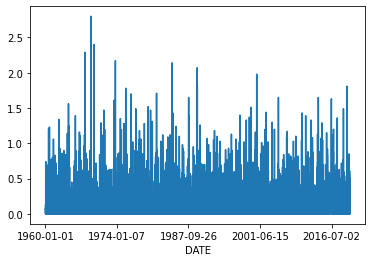

In [ ]:
#There were no large percentages of missing data, but get an idea of each column by plotting it
core_weather["precip"].plot()

Note that there are no large gaps in the time line of data. There are some outliers in precipitation, however they aren't completely absurd so we will perhaps keep them in.

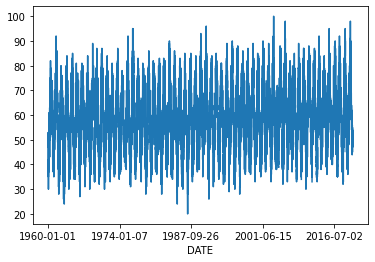

In [ ]:
core_weather["temp_max"].plot()

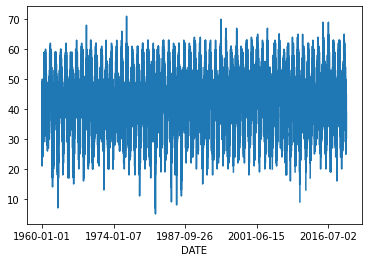

In [ ]:
core_weather["temp_min"].plot()

In [ ]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

In [ ]:
core_weather["temp_max"] = fahr_to_celsius(core_weather["temp_max"])

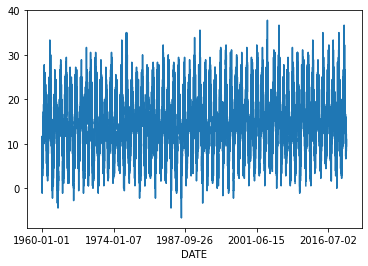

In [ ]:
core_weather["temp_max"].plot()

In [ ]:
core_weather["temp_min"] = fahr_to_celsius(core_weather["temp_min"])

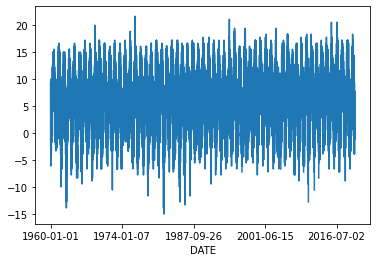

In [ ]:
core_weather["temp_min"].plot()

In [ ]:
core_weather["precip"].value_counts()

0.00    11372
0.01     1477
0.02     1150
0.04      557
0.06      514
        ...  
1.70        1
1.52        1
1.71        1
2.14        1
1.81        1
Name: precip, Length: 161, dtype: int64

In [ ]:
core_weather["temp_max"].value_counts()

 11.666667    767
 10.555556    724
 12.222222    702
 18.333333    688
 19.444444    671
             ... 
 36.666667      2
-3.888889       1
-6.666667       1
 36.111111      1
 37.777778      1
Name: temp_max, Length: 77, dtype: int64

In [ ]:
core_weather["temp_min"].value_counts()

 7.222222     917
 6.666667     866
 8.333333     862
 9.444444     830
 5.555556     794
             ... 
 21.666667      1
-15.000000      1
-13.333333      1
 20.000000      1
 21.111111      1
Name: temp_min, Length: 65, dtype: int64

In [ ]:
#Investigate the data types
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [ ]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
       '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31'],
      dtype='object', name='DATE', length=21278)

In [ ]:
#Our index which is the date can be converted to datetime - This provides advantages later on in the data manipulation
core_weather.index = pd.to_datetime(core_weather.index)

In [ ]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='DATE', length=21278, freq=None)

In [ ]:
#Example of the perk of using the to_datetime function on the index
core_weather.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='DATE', length=21278)

In [ ]:
core_weather.index.year.value_counts()

1960    366
2000    366
1988    366
1980    366
1992    366
1976    366
1996    366
2016    366
1964    366
1984    366
1999    365
1997    365
1985    365
1995    365
1994    365
1993    365
2001    365
2015    365
1961    365
1989    365
2017    365
2018    365
1987    365
1986    365
2014    365
1990    365
1983    365
1971    365
1962    365
1963    365
1965    365
1966    365
1967    365
1969    365
1970    365
2019    365
1974    365
1975    365
1981    365
1979    365
1978    365
1973    365
1977    365
2002    363
2011    363
1991    362
2013    357
1998    357
1982    355
2006    354
2010    351
1972    337
2003    331
2009    331
2012    329
2005    326
2007    325
2008    306
1968    275
2004    151
Name: DATE, dtype: int64

In [ ]:
core_weather.apply(lambda x: (x==9999)).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [ ]:
core_weather

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.12,8.333333,9.444444
1960-01-02,0.08,11.111111,3.888889
1960-01-03,0.04,11.666667,6.111111
1960-01-04,0.02,8.333333,6.111111
1960-01-05,0.00,5.555556,8.333333
...,...,...,...
2019-12-27,0.00,9.444444,6.111111
2019-12-28,0.00,9.444444,5.000000
2019-12-29,0.01,11.111111,6.666667


In [ ]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]*100

precip      0.836545
temp_max    0.394774
temp_min    0.408873
dtype: float64

In [ ]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1968-12-31,NaN,3.888889,NaN
1972-04-30,NaN,15.555556,NaN
1982-08-25,NaN,18.333333,NaN
1991-12-30,NaN,9.444444,NaN
1996-03-25,NaN,6.111111,NaN
...,...,...,...
2018-11-04,NaN,16.111111,7.222222
2018-11-05,NaN,15.000000,5.555556
2018-11-06,NaN,NaN,9.444444


In [ ]:
core_weather.loc["1968-12-20":"1969-01-10",:]

,precip,temp_max,temp_min
DATE,,,
1968-12-31,NaN,3.888889,NaN
1969-01-01,0.00,7.222222,-2.777778
1969-01-02,0.02,6.111111,-0.555556
1969-01-03,0.03,4.444444,3.888889
1969-01-04,0.00,5.000000,-0.555556
1969-01-05,0.01,7.222222,-2.222222
1969-01-06,0.22,7.777778,0.555556
1969-01-07,0.16,7.777778,0.000000
1969-01-08,0.03,6.666667,5.000000


In [ ]:
core_weather["temp_min"].value_counts()

 7.222222     917
 6.666667     866
 8.333333     862
 9.444444     830
 5.555556     794
             ... 
 21.666667      1
-15.000000      1
-13.333333      1
 20.000000      1
 21.111111      1
Name: temp_min, Length: 65, dtype: int64

In [ ]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [ ]:
core_weather["temp_max"] = core_weather["temp_max"].fillna(method = 'ffill', limit = 5)
core_weather["temp_min"] = core_weather["temp_min"].fillna(method = 'ffill', limit = 5)

In [ ]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]*100

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

In [ ]:
#We are predicting the weather for the following day, therefore new column called target with the next day's information
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [ ]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.12,8.333333,9.444444,11.111111
1960-01-02,0.08,11.111111,3.888889,11.666667
1960-01-03,0.04,11.666667,6.111111,8.333333
1960-01-04,0.02,8.333333,6.111111,5.555556
1960-01-05,0.00,5.555556,8.333333,1.666667
...,...,...,...,...
2019-12-27,0.00,9.444444,6.111111,9.444444
2019-12-28,0.00,9.444444,5.000000,11.111111
2019-12-29,0.01,11.111111,6.666667,9.444444


In [ ]:
core_weather = core_weather.iloc[:-1,:].copy()

The guided video suggested use of Ridge linear regression model
- Similar to a linear regression model BUT is solves the problem of overfitting
- Overfitting solved by adding a penalty parameter, equivalent to the square of the magnitude of the coefficients

In [ ]:
#importing models
from sklearn.linear_model import Ridge

#initialise the mode
rig = Ridge(alpha = .1)

In [46]:
X = core_weather.drop(['target'], axis = 1)
y = core_weather["target"]

In [47]:
X

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.12,8.333333,9.444444
1960-01-02,0.08,11.111111,3.888889
1960-01-03,0.04,11.666667,6.111111
1960-01-04,0.02,8.333333,6.111111
1960-01-05,0.00,5.555556,8.333333
...,...,...,...
2019-12-26,0.16,8.333333,-1.111111
2019-12-27,0.00,9.444444,6.111111
2019-12-28,0.00,9.444444,5.000000


In [48]:
y

DATE
1960-01-01    11.111111
1960-01-02    11.666667
1960-01-03     8.333333
1960-01-04     5.555556
1960-01-05     1.666667
                ...    
2019-12-26     9.444444
2019-12-27     9.444444
2019-12-28    11.111111
2019-12-29     9.444444
2019-12-30     9.444444
Name: target, Length: 21277, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [51]:
rig.fit(X_train, y_train)

Ridge(alpha=0.1)

In [52]:
#predict
y_pred = rig.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error

In [54]:
mean_absolute_error(y_test, y_pred)

1.893268161719537

https://www.youtube.com/watch?v=km95-NMT6lU&t=1366s&ab_channel=Dataquest
